In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob
import PlaceCellAnalysis as pc

os.sys.path.append('../')
import utilities as u
import preprocessing as pp
import behavior as b
import BayesianDecoding as bd


%load_ext autoreload
%autoreload 2

%matplotlib inline

4139224.2
MouseName                                                4139224.2
DateFolder                                              17_10_2018
SessionNumber                                                    1
Track                                           TwoTower_noTimeout
RewardCount                                                     60
Imaging                                                          1
ImagingRegion                                                  CA1
DateTime                                       2018-10-17 00:00:00
data file        G:\My Drive\\VR_Data\TwoTower\4139224.2\17_10_...
scanfile         G:\My Drive\2P_Data\TwoTower\4139224.2\17_10_2...
scanmat          G:\My Drive\2P_Data\TwoTower\4139224.2\17_10_2...
s2pfolder        G:\My Drive\2P_Data\TwoTower\4139224.2\17_10_2...
Name: 787, dtype: object
G:\My Drive\2P_Data\TwoTower\4139224.2\17_10_2018\TwoTower_noTimeout\TwoTower_noTimeout_001_010.mat
last indices 21152 21152
num frames 66872
MouseName          

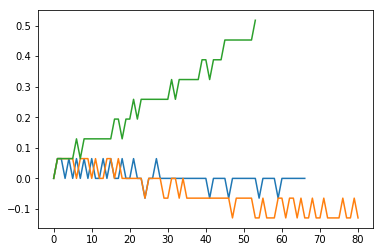

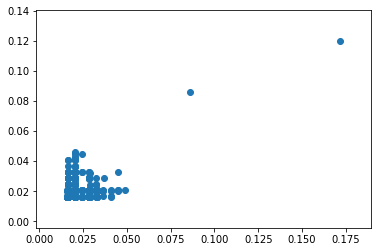

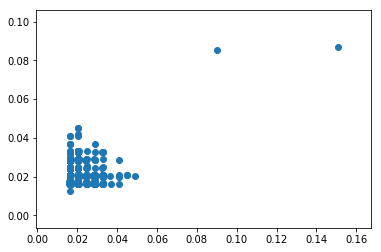

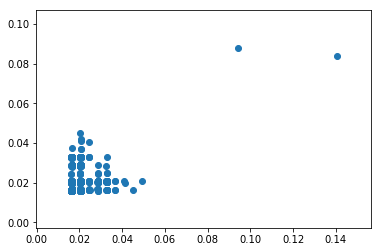

In [47]:
# load a session where a know there is the right number of TTLs
df = pp.load_session_db()
df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
mouse = '4139219.2'

# for mouse in  ['4139219.2', '4139219.3', '4139224.2', '4139224.3', '4139224.5',
#      '4139251.1','4139251.2','4139260.1','4139260.2','4139261.2','4139266.3','4139265.4']:
for mouse in ['4139224.2']:
    f,ax = plt.subplots()
    df_mouse = df[df['MouseName'].str.match(mouse)]
    df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')|
                       df_mouse['Track'].str.match('Reversal_noTimeout') | df_mouse['Track'].str.match('Reversal') |
                       df_mouse['Track'].str.match('TwoTower_foraging') ]
    print(mouse)
    # take first file
    for i in range(3):#df_mouse.shape[0]):
        sess = df_mouse.iloc[i]
        print(sess)
    # load info file

        info = pp.loadmat_sbx(sess['scanmat'])['info']
        fr = info['resfreq']/info['recordsPerBuffer']
        lr = fr*512.
        info['max_idx'] = int(os.path.getsize(sess['scanmat'][:-3]+'sbx')/info['recordsPerBuffer']/info['sz'][1]*2/4-1)
        print('last indices',info['max_idx'],info['frame'][-1])
        #print('first frames', info['frame'][0]/fr + info['line'][0]/lr
        
        st = info['frame']/fr + info['line']/lr  
        dt_st = np.diff(st)
        
#         st_r = info['frame']/fr +info['line']/lr - st[-1]
#         dt_scanTime = np.diff(scanTime)
#         print('last scan dt', dt_scanTime[-5:])
        vr = pp._get_frame(sess['data file'])
        if 'sanning' in vr.columns:
            key = 'sanning'
        elif 'scanning' in vr.columns:
            key = 'scanning'
        else:
            raise Exception("no scanning column")
            
        vr = vr[vr[key]>0]
        dt_vr = np.diff(vr['time']._values)
        np.amin(dt_vr)
        vrt_r = np.round((vr.time._values-vr['time']._values[-1])*fr)/fr
        
        dt_st = np.insert(dt_st,0,np.amin(dt_vr))
        #st_clean = info['frame']/fr
        #st_clean = st_clean[dt_st>=np.amin(dt_vr)]
        #print(st_clean.shape,st.shape)
        st_r = np.insert(info['frame']/fr ,-1,info['max_idx']/fr)
        st_r -= st_r[-1]
#         f_nearest = sp.interpolate.interp1d(st_r)
#         print(np.amin(dt_st),np.amin(dt_vr))
#         bof = info['frame'].shape[0]
#         for j in range(-1,-bof,-1000):
#             print(vrt_r[j],st_r[j])
            
        bof = info['frame'].shape[0]
        ax.plot(vrt_r[-1:-bof:-1000]-st_r[-1:-bof:-1000])
        ff,aax = plt.subplots()
        aax.scatter(dt_st[-1:-bof:-100],dt_vr[-1:-bof:-100])
        print('num frames', bof) 
#         
#         for j in range(30):
#             print(vrt_r[-bof+j],st_r[-bof+j])
            

        # find time of first pulse

        # find closest VR time (first scanning=1 frame is time 0)

        # take second to last scan frame

        # take second to last vr frame
             
            
            
       
    
# # calculate inter TTL interval on scanning computer
# scanTime = info['frame']/fr + info['line']/lr
# dt_scanTime = np.diff(scanTime)
# print(scanTime.shape)

# # calculate inter frame interval on VR computer
# vr = pp._get_frame(sess['data file'])
# dt_vr = np.diff(vr['time']._values)
# # look at last ttl to see what the dealio is
    
# calculate average time between VR clock time and 
    

In [31]:
print(df_mouse.columns)

Index(['MouseName', 'DateFolder', 'SessionNumber', 'Track', 'RewardCount',
       'Imaging', 'ImagingRegion', 'DateTime', 'data file', 'scanfile',
       'scanmat', 's2pfolder'],
      dtype='object')


In [32]:
for i in range(1,10,1):
    print(dt_vr[-i],dt_scanTime[-i])

0.09000000000014552 0.1543708943911497
0.01999999999998181 0.020717534107916435
0.01700000000005275 0.020591207680581647
0.01999999999998181 0.016296109146196613
0.020999999999958163 0.020464881253019485
0.01999999999998181 0.02033855482591207
0.01700000000005275 0.02071753410814381
0.03199999999992542 0.016422435573531402
0.020999999999958163 0.03259221829193848


In [23]:
info['frame'][-1]/fr 

1060.9964628600303

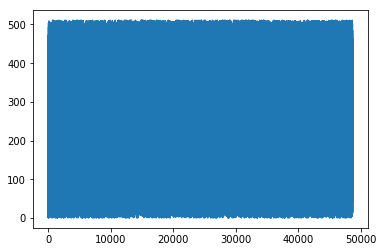

In [29]:
f,ax = plt.subplots()
ax.plot(info['line'])

In [33]:
vr.columns

Index(['time', 'morph', 'trialnum', 'pos', 'dz', 'lick', 'reward', 'tstart',
       'teleport', 'rzone', 'toutzone', 'clickOn', 'blockWalls', 'towerJitter',
       'wallJitter', 'bckgndJitter', 'sanning', 'manrewards', 'speed',
       'lick rate'],
      dtype='object')

In [59]:
vr_t = vr['time']._values[-info['frame'].shape[0]:]

In [60]:
print(vr_t.shape,info['frame'].shape)

(48743,) (48743,)


In [61]:
vr_t-=vr_t[0]
scanTime-=scanTime[0]

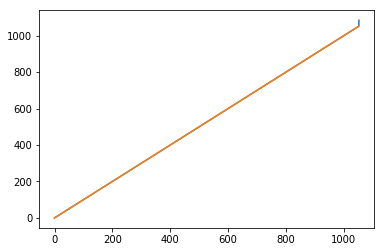

In [63]:
f,ax = plt.subplots()
ax.plot(scanTime,vr_t)
ax.plot(scanTime,scanTime)
#ax.set_xlim([0,1])
#ax.set_ylim([0,1])

In [64]:
h,edges = np.histogram(scanTime-vr_t)

In [65]:
print(h,edges)

[    1     0     0     0     0     0     0     0     0 48742] [-32.21799652 -28.95826481 -25.6985331  -22.43880139 -19.17906967
 -15.91933796 -12.65960625  -9.39987454  -6.14014282  -2.88041111
   0.3793206 ]


In [77]:
print(vr_t[-1],scanTime[-1])
print(fr)

1084.70928 1052.4912834765032
15.4609375


In [78]:
for i in range(1,scanTime.shape[0],1):
    #print(vr_t[-i],scanTime[-i])
    if i%1000==1:
        print(i)
        print(vr_t[i],scanTime[i],np.floor(vr_t[i]*fr),np.floor(vr_t[i]*fr))

1
0.020080000000000098 0.01642243557352252 0.0 0.0
1001
19.20456 19.2122283981809 296.0 296.0
2001
38.282450000000004 38.30381505811016 591.0 591.0
3001
57.50376000000001 57.52968671045983 889.0 889.0
4001
76.90117000000001 76.94340576048509 1188.0 1188.0
5001
96.02826999999999 96.06998484082871 1484.0 1484.0
6001
114.97926999999999 115.027918140475 1777.0 1777.0
7001
134.06127 134.11710459828194 2072.0 2072.0
8001
153.23767 153.30027791814047 2369.0 2369.0
9001
172.79877000000002 172.87241030823648 2671.0 2671.0
10001
192.97847 193.05482566953006 2983.0 2983.0
11001
213.27697000000003 213.36015664477006 3297.0 3297.0
12001
234.66497 234.75543203638202 3628.0 3628.0
13001
257.04407 257.15411824153614 3974.0 3974.0
14001
279.98026999999996 280.0856493178373 4328.0 4328.0
15001
303.37906999999996 303.4922940879232 4690.0 4690.0
16001
326.79447 326.91965639211725 5052.0 5052.0
17001
349.95586999999995 350.0842597271349 5410.0 5410.0
18001
372.72416999999996 372.85990399191513 5762.0 5762.

In [86]:
print(info['channels'],sess.scanmat)
info['max_idx'] = int(os.path.getsize(sess['scanmat'][:-3]+'sbx')/info['recordsPerBuffer']/info['sz'][1]*2/4-1)

2 G:\My Drive\2P_Data\TwoTower\4139224.5\18_10_2018\TwoTower_noTimeout\TwoTower_noTimeout_001_008.mat


In [87]:
print(info['max_idx'],info['frame'][-1])

16404 16404


In [44]:
h,edges = np.histogram(np.diff(vr_t))

In [45]:
print(h,edges)

[38389  5873  4208   199    14     0     2    40    13     4] [0.0121  0.02206 0.03202 0.04198 0.05194 0.0619  0.07186 0.08182 0.09178
 0.10174 0.1117 ]


In [46]:
print(info['frame'][0]/fr + info['line'][0]/lr)

8.557731177362303


In [47]:
print(vr['time']._values[-1],

KeyError: ('time', -1)